<a href="https://colab.research.google.com/github/alejandrodgb/fastai/blob/main/clean/05_pet_breeds_latest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys

if 'google.colab' in sys.modules:
    ! [ -e /content ] && pip install -Uqq fastbook
    !pip install nbdev
    
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 KB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 469.0/469.0 KB 21.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 36.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 34.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 19.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
from fastai.vision.all import *

# Data

In [3]:
path = untar_data(URLs.PETS)

In [4]:
# Review data
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_72.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_setter_194.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_126.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/beagle_53.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_8.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_161.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_107.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Siamese_153.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_204.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_6.jpg')...]

In [6]:
# Extract label from file name with regex
fname = (path/'images').ls()[0]
re.findall(r'(.+)_\d+.jpg',fname.name)

['Bombay']

In [7]:
doc(DataBlock)

In [8]:
# Build a data block
pets = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg'),'name'),
                 item_tfms=Resize(460),
                 batch_tfms=aug_transforms(size=224,min_scale=0.75))
dls = pets.dataloaders(path/'images')

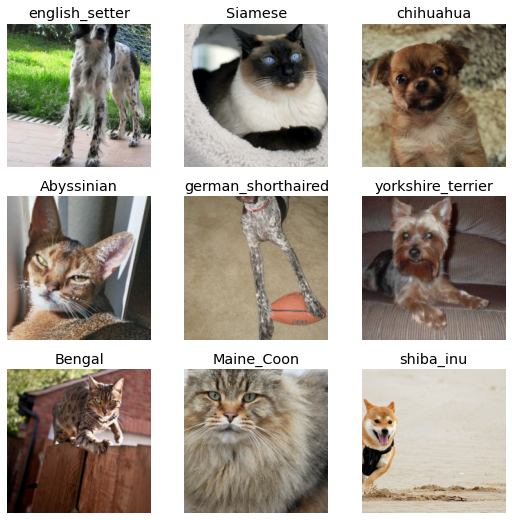

In [9]:
# Check DataBlock
dls.show_batch()

We can check our data blocks with the `summary` method. The example below is missing the resizing of the images and is picked up at the `summary` method.

In [10]:
# Check batches using the summary method
failed_pet = DataBlock(blocks=(ImageBlock,CategoryBlock),
                       get_items=get_image_files,
                       splitter=RandomSplitter(seed=42),
                       get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg'),'name'))
failed_pet.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_175.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x333
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/basset_hound_175.jpg
    applying partial gives
      basset_hound
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(14)

Final sample: (PILImage mode=RGB size=500x333, TensorCategory(14))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up af

RuntimeError: ignored

In [11]:
# Train model to check baselines and test data
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.506487,0.347323,0.100812,01:34


epoch,train_loss,valid_loss,error_rate,time
0,0.520781,0.351866,0.100812,01:37
1,0.327541,0.240092,0.069689,01:42


# Cross entropy

In [47]:
# Review dls batches passed on to model
x, y = dls.one_batch()
x.shape, y.shape

(torch.Size([64, 3, 224, 224]), torch.Size([64]))

In [48]:
y

TensorCategory([13, 29, 17,  9, 32, 27, 28, 12, 20, 17, 21,  7, 35, 33, 35, 12, 19,  7, 27,  4,  5, 18, 22, 25, 31, 18,  1,  0,  2,  3,  1, 32,  7,  4, 11,  0, 24,  9, 27, 15, 24, 14, 13, 25, 12,  5,
                 0, 25, 22, 22, 24,  9,  5,  5,  8, 33, 36,  7, 16, 20, 12, 35,  1, 14], device='cuda:0')

Each batch passes 64 images on 3 channels and 64 labels, one for each image.

In [49]:
# View the predictions (last layer activations)
preds, targs = learn.get_preds(dl=[(x,y)])
preds[0]

TensorBase([8.1485e-07, 2.5140e-06, 3.7459e-07, 2.4489e-06, 2.0687e-05, 6.9111e-06, 4.9575e-07, 1.7785e-06, 5.9157e-07, 4.9949e-05, 1.3567e-06, 4.9923e-05, 1.1566e-02, 7.1333e-02, 1.3215e-05,
            1.2674e-05, 3.0915e-04, 3.5014e-05, 3.8423e-06, 1.8119e-06, 2.9778e-05, 4.4401e-06, 2.8772e-06, 3.4138e-06, 1.6661e-05, 1.5211e-07, 4.9285e-05, 1.2323e-05, 1.3487e-06, 1.4109e-05,
            2.1675e-05, 6.6401e-06, 4.0788e-05, 1.0043e-05, 9.1636e-01, 5.5204e-06, 4.1166e-06])

In [50]:
preds.shape, targs.shape

(torch.Size([64, 37]), torch.Size([64]))

In [51]:
preds[0].shape, preds[0].sum()

(torch.Size([37]), TensorBase(1.0000))

Predictions will add up to 1 as they are passed through a Softmax activation layer at the end to bound them between 0 and 1

In [54]:
s_preds = preds.softmax(dim=1)
(-torch.log(s_preds[np.arange(len(s_preds)),y.squeeze().cpu()])).mean()

TensorCategory(2.7070)

In [53]:
loss_func = nn.CrossEntropyLoss()
loss_func(preds,y.cpu())

TensorCategory(2.7070)

# Model Interpretation

In [55]:
interp = ClassificationInterpretation.from_learner(learn)

When there are too many classes for the confusion matrix to be used, we can use `most_confused` method which will show us the cells of the confusion matrix with the most incorrect predictions.

In [56]:
interp.most_confused(min_val=5)

[('Bengal', 'Egyptian_Mau', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('boxer', 'american_bulldog', 5),
 ('staffordshire_bull_terrier', 'american_bulldog', 5)]